# Clustering 

Cluster analysis, also known as clustering, is a technique to find groups with highly similar data points. Typically, we use clustering unsupervised learning to discover hidden patterns or relationships in unlabelled data. Other usages can be anomaly detection (i.e., finding out if a data point does not belong to a group or is an outlier). One could also use the methods to reduce the dimensions of our features (i.e., using clustering as a pre-processing step to reduce the number of features). Thus, cluster analysis is a powerful tool that can help understand and analyze complex data sets and to identify patterns.

![alt text](./images/clusters.jpg "Title")

Here we will focus on the `KMeans` method. 

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Again we load a dataset with the reading data.

In [ ]:
# Works only on COLAB #
def read_csv_from_github(url):
    import requests
    from io import StringIO
    response = requests.get(url)
    data = response.text
    return pd.read_csv(StringIO(data))

url = 'https://github.com/bgagl/ML_Individual_Differences/raw/5b70d36362172bb50d5be984e8c97526dda26bd2/datasets/data_eye_speech.csv'
df = read_csv_from_github(url=url)
df.head()


In [37]:
df = pd.read_csv("./datasets/data_eye_speech.csv")
df

,vp_code,eyemovement_rate,speech_rate,reading_speed,group
0,001,4.876513,4.929337,45.454545,1
1,ABAFT17,5.029528,5.039975,83.116883,1
2,ACNMG09,5.299456,4.870547,57.142857,1
3,AKAFF09,4.690483,4.440987,64.935065,1
4,AMAMG16,5.067032,5.375254,63.636364,1
...,...,...,...,...,...
129,RE1201,5.093700,3.995258,7.250000,0
130,FA1902,4.399105,3.950355,6.750000,0
131,TD2102,4.466783,3.765455,7.500000,0
132,CA1101,4.366029,4.293169,5.000000,0


To see if an unsupervised clustering algorithm can identify the two groups in our data set, we first need to combine our features (eyemovement_rate, speech_rate, reading_speed) in `X` and store our group variable in `y`.

In [38]:
X = df[["eyemovement_rate","speech_rate","reading_speed"]]
y = df["group"]

Next, we initialize our clustering algorithm. Here we use `KMeans`, a simple unsupervised clustering method. Important to note is that we need to specify the number of clusters in advance. In the current example, we define the number with two by setting `n_clusters=2`. After that, we fit the model. Remember, the model has no target variable, i.e., a specificity of the unsupervised learning method. 

In [39]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

Next, we evaluate our clusters by predicting the label of each data point based on our fitted clustering model. Here we use the Silhouette score. The score compares the distance of any data point to all other points in the cluster with the distance to all other data points in different clusters. The score is 1 when the data point `i` is very compact within it's cluster and far away from the other clusters.

In [6]:
predictions = kmeans.predict(X)
print("Silhouette Score:", silhouette_score(X, predictions))

Silhouette Score: 0.7599565027846913


A Silhouette score of .76 is relatively high but not very surprising in our example, as we know that there have been two groups of readers. So let's look at the data with the cluster labels with a scatterplot. To do this, we must first decide which measures will be on the x and y-axis of the figure. Since our groups have been selected based on the reading speed measure included in the features, it makes sense to use this measure. In addition, we use the eye-movement sampling rate. 

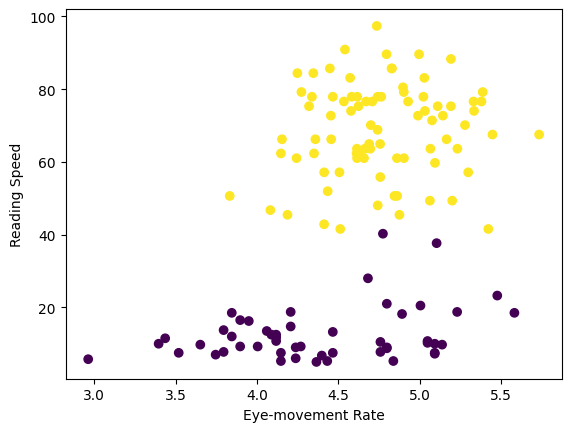

In [7]:
plt.scatter(X.eyemovement_rate, X.reading_speed, c=predictions)
plt.xlabel("Eye-movement Rate")
plt.ylabel("Reading Speed")
plt.show()

Let's compare this figure with a figure of the actual labels and estimate the overlap between the labels from the k-means clustering. 

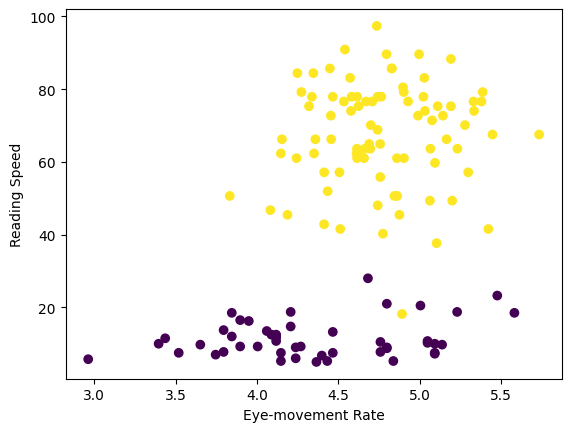

Accuracy/Error: 0.9776119402985075


In [10]:
plt.scatter(X.eyemovement_rate, X.reading_speed, c=y)
plt.xlabel("Eye-movement Rate")
plt.ylabel("Reading Speed")
plt.show()
print("Accuracy/Error:", np.mean(predictions == y))

Overall, the unsupervised approach worked quite well in this example. 

**Exercise** Estimate the clusters again but without the reading speed data column and show the clustering results in a scatter plot with Eye-movement rate and Speech rate at the axis. Again plot two figures, one with cluster labels and one with actual labels. 

One critical issue is deciding how many clusters we should expect in a dataset. Typically, one would like to explore how many reasonable clusters can be identified within a dataset. We will go over two methods one based on the so-called elbow method and one based on the Silhouette score. 

In the Elbow method, one estimates the distance of every data point to the center of the cluster (i.e., the centroid) sum.

First, we again define our set of features. 

In [41]:
X = df[["eyemovement_rate","speech_rate","reading_speed"]]

Then we define an empty list that will hold the summed of squared distances for each number of clusters and a second variable defining the range of the number of clusters. Here from one to ten, by using the `range` function. Note we start with one here as we only measure the distance to the center of the cluster without considering the distance to other clusters. 

In [40]:
K = range(1,10)
Sum_of_squared_distances = []

Next, we will fit and score `kmeans` models for each number of clusters defined and calculate the squared distances measure in a `for` loop. We get the measure by extracting it from the fitted model by `kmeans.inertia_`.

In [42]:
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

Let's look at the measure in relation to the number of clusters defined.

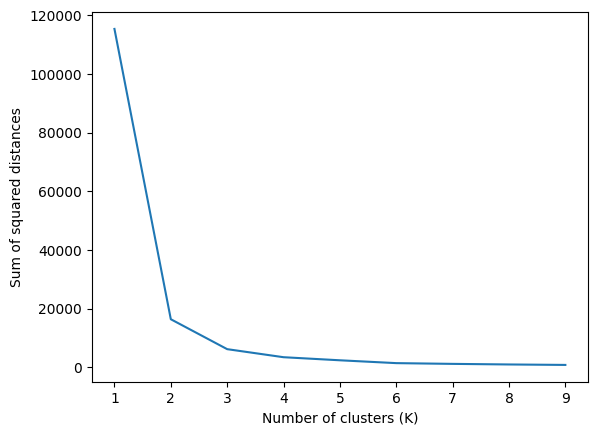

In [43]:
plt.plot(K,Sum_of_squared_distances)
plt.xlabel("Number of clusters (K)") 
plt.ylabel("Sum of squared distances") 
plt.show()

The smaller the squared distances, the better the clustering solution. The goal is to minimize the squared distances, so typically, in the figure, we will see a steep decrease, and then commonly, no substantial reduction can be found with increasing the number of clusters. 

The optimal number of clusters is typically in this curve's kink (i.e., the elbow). In this example, this is with two or three clusters. 

Let's look at another measure that also considers the distance to the other clusters of the solution (i.e., the Silhouette score). Note since we also measure the distance to the other clusters, we need to start with at least 2 clusters. Again, we define a new variable that stores the measure from each run of the for loop implementing another solution with a different number of clusters. 

In [34]:
X = df[["eyemovement_rate","speech_rate","reading_speed"]]
K = range(2,10)
silhouette_avg = []
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

Let's look at the measure in relation to the number of clusters defined.

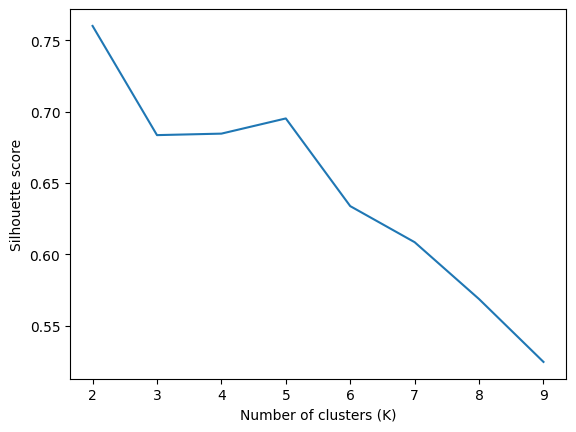

In [35]:
plt.plot(K,silhouette_avg)
plt.xlabel("Number of clusters (K)") 
plt.ylabel("Silhouette score")
plt.show()

As we learned above, high Silhouette scores represent more optimal solutions. Here we find that the optimal solution is with `k == 2`, i.e., the one with two clusters. 

**Exercise** Estimate the optimal number of clusters when we remove the `reading_speed` variable from the features. Use both methods described above. 